---
# Customer Churn Prediction 
---

| Column Name       | Description                                  | Data Type   |
|-------------------|----------------------------------------------|-------------|
| customerID        | Unique customer identifier                   | Object      |
| gender            | Customer's gender (Male or Female)          | Object      |
| SeniorCitizen     | Senior citizen status (1 for Yes, 0 for No) | Integer     |
| Partner           | Whether the customer has a partner (Yes/No) | Object      |
| Dependents        | Whether the customer has family members or dependents who are also using the same service or subscription (Yes/No)| Object      |
| tenure            | Number of months customer stayed            | Integer     |
| PhoneService      | Phone service status (Yes or No)            | Object      |
| MultipleLines     | Multiple phone lines status (Yes/No/No svc) | Object      |
| InternetService   | Internet service provider (DSL, Fiber, No)  | Object      |
| OnlineSecurity    | Online security status (Yes/No/No svc)      | Object      |
| OnlineBackup      | Online backup status (Yes/No/No svc)        | Object      |
| DeviceProtection  | Device protection status (Yes/No/No svc)    | Object      |
| TechSupport       | Tech support status (Yes/No/No svc)         | Object      |
| StreamingTV       | Streaming TV status (Yes/No/No svc)         | Object      |
| StreamingMovies   | Streaming movies status (Yes/No/No svc)     | Object      |
| Contract          | Contract type (Month-to-month, 1 yr, 2 yr)  | Object      |
| PaperlessBilling  | Paperless billing status (Yes/No)           | Object      |
| PaymentMethod     | Payment method chosen by customer           | Object      |
| MonthlyCharges    | Monthly charges incurred by the customer   | Float       |
| TotalCharges      | Total charges incurred by the customer     | Object      |
| Churn             | Churn status (Yes/No)...measure of customers leaving the business                        | Object      |

### Import Libraries

In [555]:
import warnings
warnings.filterwarnings('ignore')
# Data manipulation and analysis
import pandas as pd
# Linear algebra/numerical operations  
import numpy as np
# Visualization    
import seaborn as sns  
import matplotlib.pyplot as plt     
%matplotlib inline
# For Machine or Deep Learning
import tensorflow as tf
# High-level api for tensorflow   
from tensorflow import keras  
# Pre-processing tool
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
# Classifiers  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# Evaluation metrics  
from sklearn.metrics import f1_score, precision_score, recall_score, r2_score   
from scipy.stats import randint, boxcox
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [556]:
cc = pd.read_csv('telco_customer_churn.csv')
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [557]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [558]:
# cc.isnull().sum()
# No null values
cc.shape

(7043, 21)

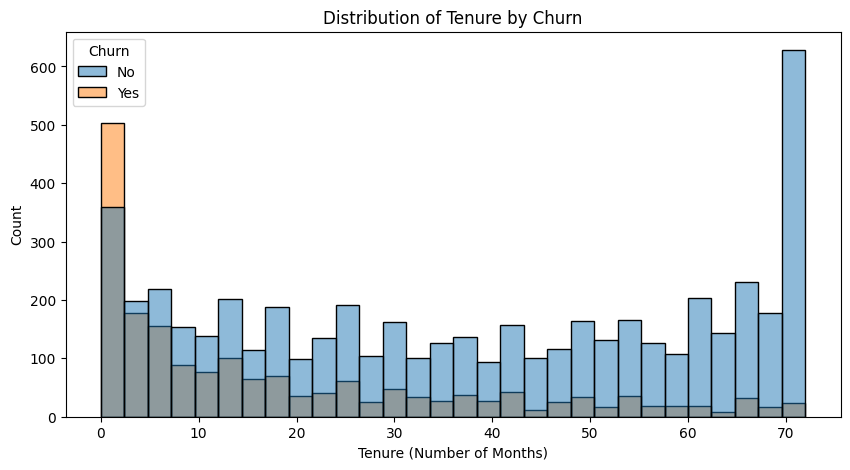

In [559]:
# Tenure means the number of months the customer has stayed with the company
plt.figure(figsize=(10, 5))
sns.histplot(data=cc, x='tenure', hue='Churn', bins=30, kde=False, common_norm=False)

plt.xlabel('Tenure (Number of Months)')
plt.ylabel('Count')
plt.title('Distribution of Tenure by Churn')

plt.show()

### Data Cleaning

In [560]:
# pd.to_numeric(cc['TotalCharges'])
# ValueError: Unable to parse string " " at position 488
pd.to_numeric(cc['TotalCharges'], errors = 'coerce') # It works but...

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [561]:
# ...we got null values to deal with.
print("Null values in TotalCharges:", pd.to_numeric(cc['TotalCharges'], errors = 'coerce').isnull().sum())

Null values in TotalCharges: 11


In [562]:
# legit nothing
cc[pd.to_numeric(cc['TotalCharges'], errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [563]:
# Converting dtype of TotalCharges from string to integer/float 
cc.TotalCharges = pd.to_numeric(cc['TotalCharges'], errors = 'coerce')

In [564]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [565]:
# Filling null values with mean of TotalCharges
mean_value = cc['TotalCharges'].mean()
cc['TotalCharges'].fillna(mean_value, inplace=True)

In [566]:
cc.TotalCharges.isnull().sum()

0

In [567]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [568]:
# Dropping unwanted columns
cc.drop('customerID', axis='columns', inplace = True)

In [569]:
cc.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1745,Female,0,Yes,Yes,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1119.90,No
6154,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.20,7711.45,No
412,Female,0,Yes,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,2149.05,No
6373,Male,0,Yes,Yes,44,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),92.95,4122.90,No
5811,Male,0,Yes,No,61,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),80.90,4932.50,No
3079,Female,0,No,No,4,Yes,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),68.65,261.25,Yes
611,Female,0,Yes,Yes,9,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Month-to-month,No,Mailed check,65.00,663.05,Yes
6488,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.50,69.50,Yes
6333,Female,1,No,No,60,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,106.00,6441.40,Yes
6575,Female,0,No,No,22,Yes,Yes,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,59.05,1253.50,No


In [570]:
for col in cc:
    if cc[col].dtypes == 'object':
        print(col ,cc[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [571]:
numeric_columns = cc.select_dtypes(include=['int64', 'float64'])
for col in numeric_columns.columns:
    print(col)

SeniorCitizen
tenure
MonthlyCharges
TotalCharges


### Dealing with Outliers

In [572]:
def var_summary(x):
# UC = MEAN + 2 STD
    uc = x.mean()+(2*x.std())
    lc = x.mean()-(2*x.std())
    
    for i in x:
        if i<lc or i>uc:
            count = 1             # This means that column is having an OUTLier
        else:
            count = 0             # That column in not having an outliers
            
    outlier_flag = count
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), 
                      x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),
                      x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                      x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max() , 
                      lc , uc,outlier_flag],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 
                         'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,
                         'MAX','LC','UC','outlier_flag'])

In [573]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [574]:
cc[numeric_columns].apply(lambda x: var_summary(x))

,tenure,MonthlyCharges,TotalCharges
N,7043.000000,7043.000000,7.043000e+03
NMISS,0.000000,0.000000,0.000000e+00
SUM,227990.000000,456116.600000,1.608129e+07
MEAN,32.371149,64.761692,2.283300e+03
MEDIAN,29.000000,70.350000,1.400550e+03
STD,24.559481,30.090047,2.265000e+03
VAR,603.168108,905.410934,5.130226e+06
MIN,0.000000,18.250000,1.880000e+01
P1,1.000000,19.200000,1.990000e+01
P5,1.000000,19.650000,4.965000e+01


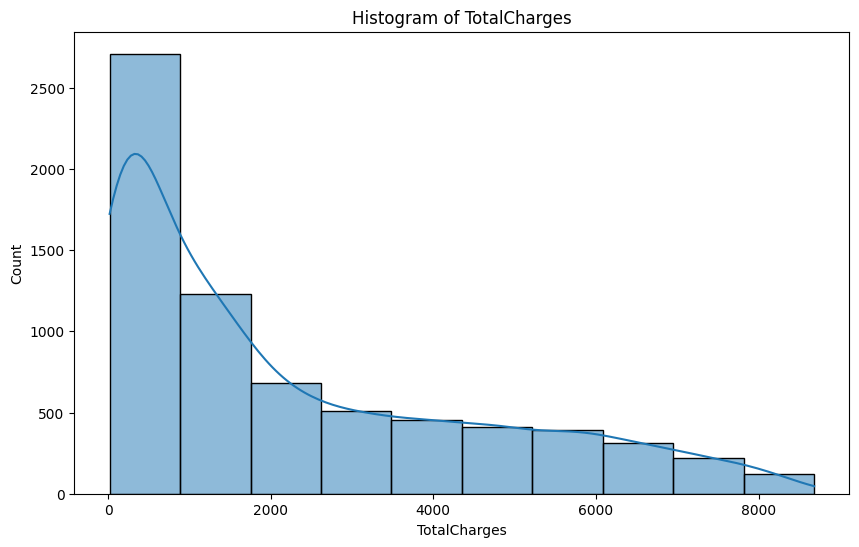

In [575]:
plt.figure(figsize=(10, 6))
sns.histplot(cc['TotalCharges'], kde=True, bins = 10)
plt.title('Histogram of TotalCharges')
plt.xlabel('TotalCharges')
plt.show()

#### With Imputation 
Replacing the outliers in the 'TotalCharges' column with the mean values

In [576]:
# mtc = cc['TotalCharges'].median()
# cc['TotalCharges'] = cc['TotalCharges'].apply(lambda x: mtc if abs(x) > 2 else x)

#### Removing the Outliers (Not-Recommended)

In [577]:
# cc.shape

In [578]:
# Define a Z-Score threshold for outliers (e.g., 2 or 3 standard deviations)
# threshold = 2 
# z_scores = stats.zscore(cc['TotalCharges'])
# Create a new column with Z-Score values
# cc['Z_Score'] = z_scores

In [579]:
# Finding rows with outliers
# outlier_rows = cc[abs(z_scores) > threshold]
# outlier_rows

In [580]:
# cc = cc[abs(z_scores) <= threshold]

In [581]:
# cc.shape

In [582]:
# cc.drop('Z_Score', axis='columns', inplace = True)

#### Log Transformation 
Instead of imputing or removing outliers, we can also use log transformations to make our model less sensitive to extreme values.

In [583]:
# Apply log transformation to the feature with outliers
# cc['TotalCharges'] = np.log1p(cc['TotalCharges'])

#### Winsorization (Recommended)
Winsorization caps extreme values at a specified threshold.

In [584]:
lower_bound = cc['TotalCharges'].quantile(0.01)
upper_bound = cc['TotalCharges'].quantile(0.99)
cc['TotalCharges'] = cc['TotalCharges'].clip(lower_bound, upper_bound)

#### Box-Cox Transformation
The Box-Cox transformation is a family of power transformations that includes logarithm (when the power is 0) and square root (when the power is 0.5) transformations.

In [585]:
# Adding 1 to handle zero values
# cc['TotalCharges_boxcox'], _ = boxcox(cc['TotalCharges'] + 1) 

#### Square Root Transformation:
Taking the square root is another option, particularly effective for data with moderate positive skewness.

In [586]:
# cc['TotalCharges_sqrt'] = np.sqrt(cc['TotalCharges'])

### Data Scaling

In [587]:
# Replacing unnescessary data 
for col in cc:
    if cc[col].dtypes == 'object':
        print(col ,cc[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [588]:
cc.replace('No phone service', 'No', inplace = True)
cc.replace('No internet service', 'No', inplace = True)

In [589]:
for col in cc:
    if cc[col].dtypes == 'object':
        print(col ,cc[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [590]:
# Store categorical columns containing 'Yes' and 'No'
yes_no_cols = []
for col in cc:
    unique_cols = cc[col].unique()
    if sorted(unique_cols) == ['No', 'Yes']:
        yes_no_cols.append(col)

print(yes_no_cols)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [591]:
# Replacing catcategorical data with binary values
for col in yes_no_cols:
    cc[col].replace({'Yes': 1, 'No': 0}, inplace=  True)

In [592]:
for col in cc:
    if cc[col].dtypes == 'object':
        print(col ,cc[col].unique())

gender ['Female' 'Male']
InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [593]:
cc['gender'].replace({'Male': 0, 'Female': 1}, inplace = True)

In [594]:
for col in cc:
    if cc[col].dtypes == 'object':
        print(col ,cc[col].unique())

InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


If you have many categorical features or features with high cardinality (many unique values), this can lead to a significant increase in the number of columns and data size.

Whereas for us, our cardinality is 3

In [595]:
cc1 = pd.get_dummies(data = cc, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [596]:
cc1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


In [597]:
# Finding bool columns
bool_cols = []
for col in cc1:
    if cc1[col].dtypes == 'bool':
        bool_cols.append(col)

print(bool_cols)

['InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [598]:
# Converting booleans into integer dtypes
for col in bool_cols:
    cc1[col] = cc1[col].astype(int)

In [599]:
correlation_matrix = cc1.corr()
churn_correlations = correlation_matrix["Churn"].sort_values(ascending=False)
print(churn_correlations)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040102
PhoneService                             0.011942
gender                                   0.008612
DeviceProtection                        -0.066160
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport                             -0.164674
OnlineSecurity                          -0.171226
Contract_One year                       -0.177820


In [600]:
# Scaling the remaining columns 
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
cc1[cols_to_scale] = scaler.fit_transform(cc1[cols_to_scale])

In [601]:
correlation_matrix = cc1.corr()
churn_correlations = correlation_matrix["Churn"].sort_values(ascending=False)
print(churn_correlations)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040102
PhoneService                             0.011942
gender                                   0.008612
DeviceProtection                        -0.066160
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport                             -0.164674
OnlineSecurity                          -0.171226
Contract_One year                       -0.177820


- A positive correlation (e.g., values close to 1) suggests that as the values in the other column increase, the likelihood of churn increases. For example, "Contract_Month-to-month" and "InternetService_Fiber optic" have positive correlations with churn, indicating that customers with month-to-month contracts or fiber optic internet service are more likely to churn.
<br><br>
- A negative correlation (e.g., values close to -1) suggests that as the values in the other column increase, the likelihood of churn decreases. For example, "tenure" has a negative correlation with churn, suggesting that customers with longer tenure are less likely to churn.
<br><br>
- Correlation values close to 0 indicate a weak linear relationship between the columns. For example, "gender" and "PhoneService" have correlation values close to 0, suggesting that these factors have little to no impact on churn.

In [602]:
for col in cc1:
    print(col ,cc1[col].unique())

gender [1 0]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
Strea

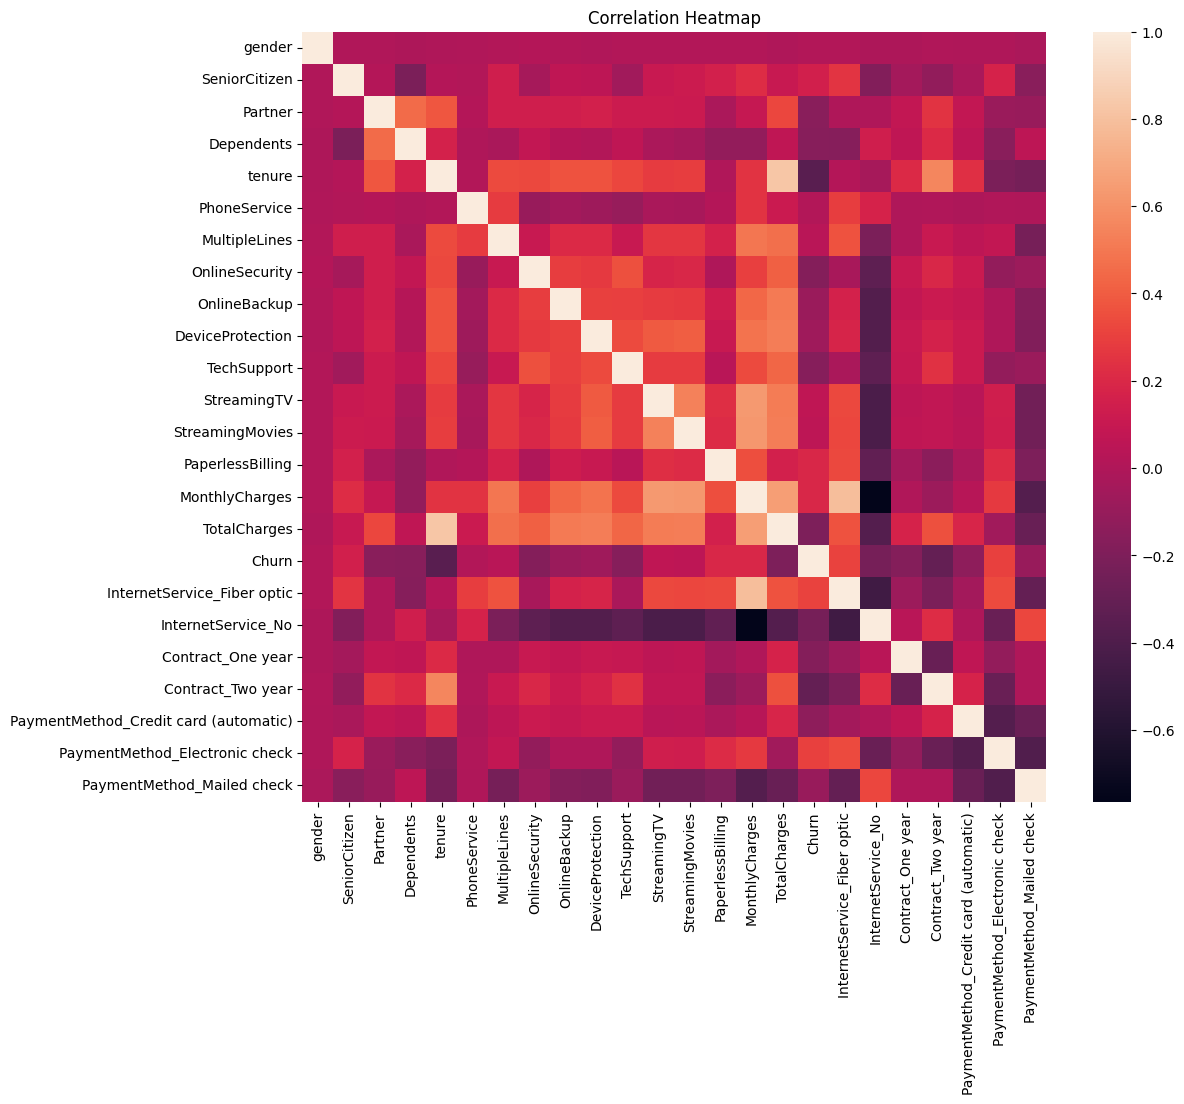

In [603]:
corr_matrix = cc1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix)
plt.title('Correlation Heatmap')
plt.show()

## Building Model

In [604]:
x = cc1.drop('Churn', axis = 1)
y = cc1['Churn']

In [605]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [606]:
y_train = pd.DataFrame(y_train, columns=['Churn'])
y_test = pd.DataFrame(y_test, columns=['Churn'])

In [607]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [608]:
def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual: ground truth
    '''
    cm = confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index=["Churned", "Not Churned"],
                         columns=["Churned", "Not Churned"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f" {v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

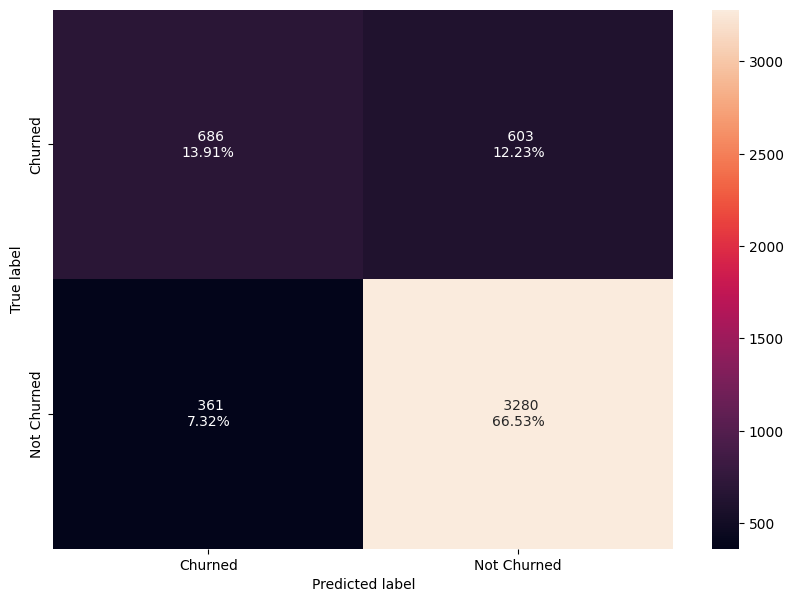

In [609]:
pred_train = model.predict(x_train)
make_confusion_matrix(y_train, pred_train)

In [610]:
pred_train_df = pd.DataFrame(pred_train, columns=['Predicted'])

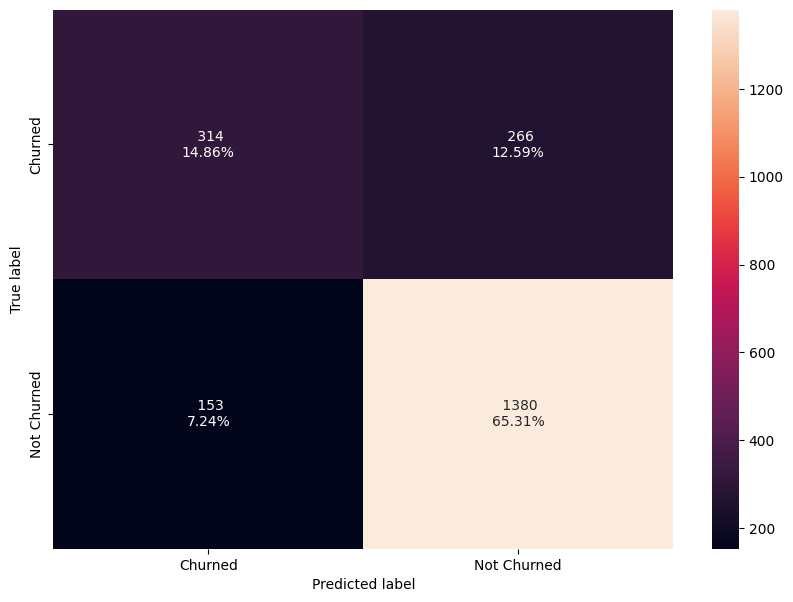

In [611]:
pred_test = model.predict(x_test)
make_confusion_matrix(y_test, pred_test)

In [612]:
pred_test_df = pd.DataFrame(pred_test, columns=['Predicted'])

In [613]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
print(f"The percentage of correctly predicted instances (both true positives and true negatives) out of the total instances.")
print(f'Accuracy on train data: {round(accuracy_score(y_train, pred_train), 4)*100}%')
print(f'Accuracy on test data: {round(accuracy_score(y_test, pred_test), 4)*100}%\n')

print(f"The percentage of actual positive instances that were correctly predicted.")
print(f'Recall on train data: {round(recall_score(y_train, pred_train), 4)*100}%')
print(f'Recall on test data: {round(recall_score(y_test, pred_test), 4)*100}%\n')

print(f"The percentage of predicted positive instances that were actually positive.")
print(f'Precision on train data: {round(precision_score(y_train, pred_train), 4)*100}%')
print(f'Precision on test data: {round(precision_score(y_test, pred_test), 4)*100}%\n')

print(f"A metric that combines both precision and recall into a single value. It is a balanced measure")
print(f'F1 score on train data: {round(f1_score(y_train, pred_train), 4)*100}%')
print(f'F1 score on test data: {round(f1_score(y_test, pred_test), 4)*100}%')

The percentage of correctly predicted instances (both true positives and true negatives) out of the total instances.
Accuracy on train data: 80.45%
Accuracy on test data: 80.17%

The percentage of actual positive instances that were correctly predicted.
Recall on train data: 53.22%
Recall on test data: 54.14%

The percentage of predicted positive instances that were actually positive.
Precision on train data: 65.52%
Precision on test data: 67.24%

A metric that combines both precision and recall into a single value. It is a balanced measure
F1 score on train data: 58.730000000000004%
F1 score on test data: 59.98%


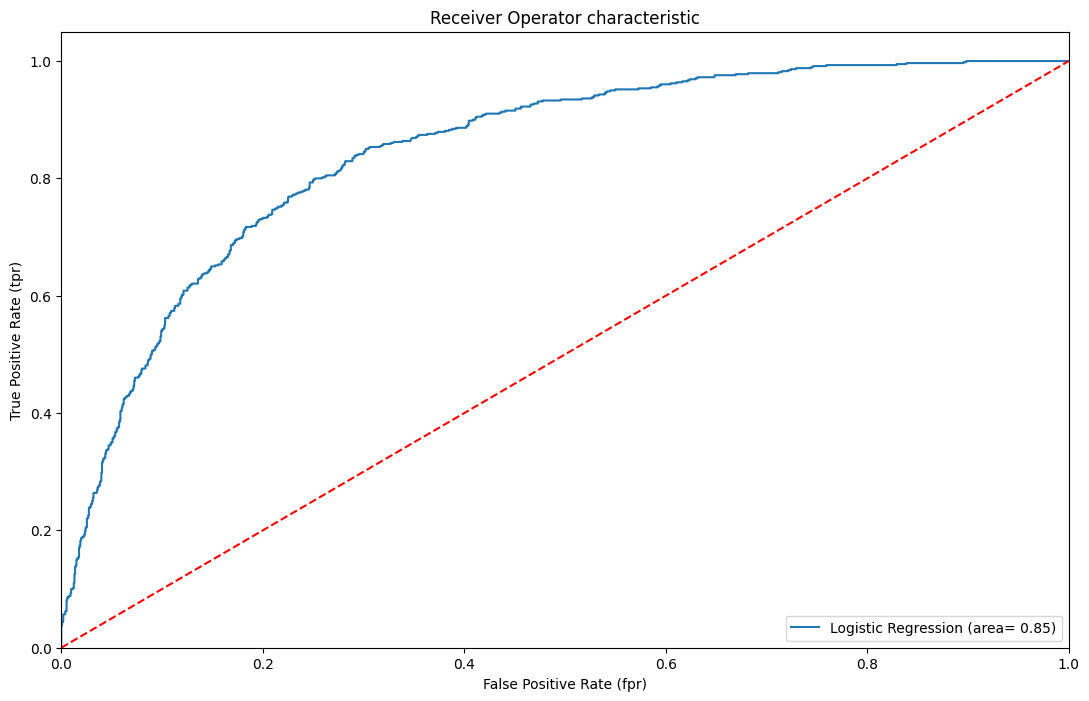

In [614]:
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, model.predict_proba(x_test) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [615]:
train_pred_prob = model.predict_proba(x_train)[:,1]
train_pred_prob

array([0.07624192, 0.54424699, 0.20948104, ..., 0.76584833, 0.01221355,
       0.63489821])

#### Simpler Explanation

In [616]:
# Example predicted probabilities
sample_train_pred_prob = np.array([0.25, 0.67, 0.21, 0.80, 0.45])

# Example threshold
sample_threshold = 0.5

# Convert probabilities to binary predictions using the threshold
sample_binary_predictions = np.where(sample_train_pred_prob >= sample_threshold, 1, 0)

# Display the results
for prob, prediction in zip(sample_train_pred_prob, sample_binary_predictions):
    print(f"Predicted Probability: {prob:.2f} => Predicted Class: {prediction}")

Predicted Probability: 0.25 => Predicted Class: 0
Predicted Probability: 0.67 => Predicted Class: 1
Predicted Probability: 0.21 => Predicted Class: 0
Predicted Probability: 0.80 => Predicted Class: 1
Predicted Probability: 0.45 => Predicted Class: 0


In [617]:
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0, 1.01, 0.01)

for cutoff in Cutoff_Prob:
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Churn == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Churn == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Churn == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Churn == 0)).sum()
    P = TP + FN
    N = TN + FP

    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    cutoff_data = cutoff_data._append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data
y_train.drop("pred_y", axis=1, inplace=True)

#### We've got the basic cutoff data. Let's now get all features needed to decide the cutoff

In [618]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2)** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [619]:
cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,0.00,1289.0,0.0,0.0,3641.0,1289.0,3641.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.261460,1.000000,1.000000,0.414536
1,0.01,1284.0,5.0,387.0,3254.0,1289.0,3641.0,0.996121,0.106289,0.893719,0.102411,0.996121,0.282944,0.996121,0.893711,0.440707
2,0.02,1279.0,10.0,754.0,2887.0,1289.0,3641.0,0.992242,0.207086,0.792952,0.199328,0.992242,0.307009,0.992242,0.792914,0.468928
3,0.03,1273.0,16.0,962.0,2679.0,1289.0,3641.0,0.987587,0.264213,0.735892,0.251800,0.987587,0.322115,0.987587,0.735787,0.485785
4,0.04,1269.0,20.0,1155.0,2486.0,1289.0,3641.0,0.984484,0.317221,0.682956,0.301705,0.984484,0.337949,0.984484,0.682779,0.503172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,0.0,1289.0,3641.0,0.0,1289.0,3641.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
97,0.97,0.0,1289.0,3641.0,0.0,1289.0,3641.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
98,0.98,0.0,1289.0,3641.0,0.0,1289.0,3641.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
99,0.99,0.0,1289.0,3641.0,0.0,1289.0,3641.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN


In [620]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data ["Dist"]), "Cutoff_Prob"]
ks_cutoff =  cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)
# Instances with predicted probabilities greater than or equal to <cut_off> are classified as positive.

The dist cutoff determined is: 0.26
The KS cutoff determined is: 0.26
The f1 cutoff determined is: 0.29


In [621]:
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

for cutoff in cutoffs:
  y_pred_train = (model.predict_proba(x_train)[:,1]> cutoff).astype(int)
  y_pred_test = (model.predict_proba(x_test)[:,1]> cutoff).astype(int)

print("Using the cutoff value as:", cutoff)
print('\nAccuracy on train data:', accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
print("\nRecall on train data:", recall_score(y_train, y_pred_train))
print("Recall on test data:", recall_score(y_test, y_pred_test))
print("\nPrecision on train data:", precision_score(y_train, y_pred_train))
print("Precision on test data:", precision_score(y_test, y_pred_test))
print("\nf1 score on train data:", f1_score(y_train, y_pred_train))
print("f1 score on test data:", f1_score(y_test, y_pred_test))

Using the cutoff value as: 0.29

Accuracy on train data: 0.7661257606490872
Accuracy on test data: 0.7619498343587316

Recall on train data: 0.7680372381691234
Recall on test data: 0.7931034482758621

Precision on train data: 0.5368763557483731
Precision on test data: 0.5456702253855279

f1 score on train data: 0.6319821257580593
f1 score on test data: 0.646521433591005


In [622]:
default = 0.5
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]
results = []

for cutoff in cutoffs:
    y_pred_train = (model.predict_proba(x_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (model.predict_proba(x_test)[:, 1] > cutoff).astype(int)

    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_score(y_train, y_pred_train),
        'Accuracy_test': accuracy_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train': precision_score(y_train, y_pred_train),
        'Precision_test': precision_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),
        'F1_test': f1_score(y_test, y_pred_test),
    }

    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
result = pd.DataFrame(results)
result

,Cutoff,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,0.50,0.804462,0.801704,0.532196,0.541379,0.655205,0.672377,0.587329,0.599809
1,0.26,0.753550,0.748225,0.802948,0.822414,0.518537,0.526490,0.630137,0.641992
2,0.26,0.753550,0.748225,0.802948,0.822414,0.518537,0.526490,0.630137,0.641992
3,0.29,0.766126,0.761950,0.768037,0.793103,0.536876,0.545670,0.631982,0.646521


In [623]:
round_result = result.copy()

In [624]:
round_result = (result.round(6) * 100).astype(float)

In [625]:
round_result

,Cutoff,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,50.0,80.4462,80.1704,53.2196,54.1379,65.5205,67.2377,58.7329,59.9809
1,26.0,75.3550,74.8225,80.2948,82.2414,51.8537,52.6490,63.0137,64.1992
2,26.0,75.3550,74.8225,80.2948,82.2414,51.8537,52.6490,63.0137,64.1992
3,29.0,76.6126,76.1950,76.8037,79.3103,53.6876,54.5670,63.1982,64.6521


In [626]:
import statsmodels.api as sm
from statsmodels.api import add_constant
x1 = x.copy()
x1 = add_constant(x1)

In [627]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.25)
print("Size of X_train:", x_train.shape)
print("Size of X_test:", x_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

Size of X_train: (5282, 24)
Size of X_test: (1761, 24)
Size of y_train: (5282,)
Size of y_test: (1761,)


In [628]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif_after_dropping(X_train):
    # Calculate VIF for each independent variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    print("Updated VIF values after dropping variables:")
    print(vif_data)
    print("\n")
    # Return variables with VIF greater than the threshold
    high_vif_vars = vif_data[vif_data['VIF'] > 5]['Variable'].tolist()
    print(f"Variables with VIF greater than 5: {high_vif_vars} Len of it: {len(high_vif_vars)}")

#### Heads-Up
When you encounter "inf" (infinity) as the VIF value for a variable, it indicates perfect multicollinearity. Perfect multicollinearity occurs when one or more independent variables in your model can be exactly predicted from the others. In other words, there is a linear relationship among a subset of your variables.

In [630]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

                                 Variable         VIF
15                         MonthlyCharges  868.183965
17            InternetService_Fiber optic  148.463854
18                     InternetService_No  105.111095
0                                   const   72.995341
6                            PhoneService   34.126025
13                        StreamingMovies   24.220023
12                            StreamingTV   24.219070
16                           TotalCharges   10.625811
5                                  tenure    7.356702
7                           MultipleLines    7.258538
10                       DeviceProtection    6.939202
9                            OnlineBackup    6.825330
11                            TechSupport    6.439193
8                          OnlineSecurity    6.418037
20                      Contract_Two year    2.650854
22         PaymentMethod_Electronic check    1.961684
23             PaymentMethod_Mailed check    1.849978
19                      Cont

In [631]:
print(churn_correlations)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040102
PhoneService                             0.011942
gender                                   0.008612
DeviceProtection                        -0.066160
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport                             -0.164674
OnlineSecurity                          -0.171226
Contract_One year                       -0.177820


In [632]:
x_train = x_train.drop("OnlineSecurity", axis=1)
check_vif_after_dropping(x_train)

Updated VIF values after dropping variables:
                                 Variable         VIF
14                         MonthlyCharges  200.269499
0                                   const   44.151919
16            InternetService_Fiber optic   32.631851
17                     InternetService_No   30.540663
15                           TotalCharges   10.592598
6                            PhoneService    8.984161
5                                  tenure    7.355072
12                        StreamingMovies    6.635198
11                            StreamingTV    6.483568
10                            TechSupport    2.785821
9                        DeviceProtection    2.756017
7                           MultipleLines    2.711245
8                            OnlineBackup    2.668854
19                      Contract_Two year    2.642419
21         PaymentMethod_Electronic check    1.961415
22             PaymentMethod_Mailed check    1.849977
18                      Contract_One 

In [633]:
x_train = x_train.drop("InternetService_No", axis=1)
check_vif_after_dropping(x_train)

Updated VIF values after dropping variables:
                                 Variable        VIF
0                                   const  27.803487
14                         MonthlyCharges  16.728999
15                           TotalCharges  10.425311
5                                  tenure   7.350853
16            InternetService_Fiber optic   5.645960
18                      Contract_Two year   2.584080
12                        StreamingMovies   2.221084
11                            StreamingTV   2.205027
20         PaymentMethod_Electronic check   1.955952
21             PaymentMethod_Mailed check   1.848003
10                            TechSupport   1.842170
9                        DeviceProtection   1.747005
8                            OnlineBackup   1.710502
17                      Contract_One year   1.614765
7                           MultipleLines   1.580482
19  PaymentMethod_Credit card (automatic)   1.554133
3                                 Partner   1.478636
6

In [634]:
x_train = x_train.drop("tenure", axis=1)
check_vif_after_dropping(x_train)

Updated VIF values after dropping variables:
                                 Variable        VIF
0                                   const  21.720978
13                         MonthlyCharges  15.813227
15            InternetService_Fiber optic   5.645852
14                           TotalCharges   3.850068
11                        StreamingMovies   2.218549
17                      Contract_Two year   2.214989
10                            StreamingTV   2.201597
19         PaymentMethod_Electronic check   1.952242
9                             TechSupport   1.834876
20             PaymentMethod_Mailed check   1.772862
8                        DeviceProtection   1.745513
7                            OnlineBackup   1.710119
6                           MultipleLines   1.572653
18  PaymentMethod_Credit card (automatic)   1.553686
16                      Contract_One year   1.526492
3                                 Partner   1.461506
5                            PhoneService   1.449079
4

In [635]:
x_train_2 = x_train.drop("Contract_Two year", axis=1)
check_vif_after_dropping(x_train_2)

Updated VIF values after dropping variables:
                                 Variable        VIF
0                                   const  20.655434
13                         MonthlyCharges  14.287084
15            InternetService_Fiber optic   5.626427
14                           TotalCharges   3.093601
11                        StreamingMovies   2.182405
10                            StreamingTV   2.166876
18         PaymentMethod_Electronic check   1.923256
9                             TechSupport   1.766180
19             PaymentMethod_Mailed check   1.764768
8                        DeviceProtection   1.724565
7                            OnlineBackup   1.707998
6                           MultipleLines   1.566903
17  PaymentMethod_Credit card (automatic)   1.553448
3                                 Partner   1.454329
5                            PhoneService   1.416917
4                              Dependents   1.385429
12                       PaperlessBilling   1.182651
2

In [636]:
print(x_train_2.columns, len(x_train_2.columns))

Index(['const', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic',
       'Contract_One year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object') 20


In [638]:
def find_top_n_p_values(lres, n=3):
    # Access the summary table
    summary_table = lres.summary()
    # Extract P>|z| values from the summary
    p_values = [float(row[4]) for row in summary_table.tables[1].data[1:]] 
    # Find the top N P>|z| values and their corresponding variables
    top_n_p_values = sorted(set(p_values), reverse=True)[:n]
    top_n_variables = [row[0] for row in summary_table.tables[1].data[1:] if float(row[4]) in top_n_p_values]
    return top_n_variables, top_n_p_values

In [639]:
lrm = sm.Logit(y_train, x_train_2)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.432738
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5262
Method:                           MLE   Df Model:                           19
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2413
Time:                        19:22:02   Log-Likelihood:                -2285.7
converged:                       True   LL-Null:                       -3012.9
Covariance Type:            nonrobust   LLR p-value:                2.865e-297
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3952      

In [640]:
x_train_2 = x_train_2.drop('StreamingTV', axis=1)

lrm = sm.Logit(y_train, x_train_2)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.432748
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5263
Method:                           MLE   Df Model:                           18
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2413
Time:                        19:23:26   Log-Likelihood:                -2285.8
converged:                       True   LL-Null:                       -3012.9
Covariance Type:            nonrobust   LLR p-value:                3.317e-298
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3937      

In [641]:
x_train_2 = x_train_2.drop('StreamingMovies', axis=1)

lrm = sm.Logit(y_train, x_train_2)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.432750
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5264
Method:                           MLE   Df Model:                           17
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2413
Time:                        19:23:56   Log-Likelihood:                -2285.8
converged:                       True   LL-Null:                       -3012.9
Covariance Type:            nonrobust   LLR p-value:                3.559e-299
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3938      

In [642]:
x_train_2 = x_train_2.drop('Partner', axis=1)

lrm = sm.Logit(y_train, x_train_2)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.432796
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5265
Method:                           MLE   Df Model:                           16
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2412
Time:                        19:24:27   Log-Likelihood:                -2286.0
converged:                       True   LL-Null:                       -3012.9
Covariance Type:            nonrobust   LLR p-value:                4.680e-300
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4092      

In [643]:
x_train_2 = x_train_2.drop('MultipleLines', axis=1)

lrm = sm.Logit(y_train, x_train_2)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.433050
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5266
Method:                           MLE   Df Model:                           15
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2408
Time:                        19:24:48   Log-Likelihood:                -2287.4
converged:                       True   LL-Null:                       -3012.9
Covariance Type:            nonrobust   LLR p-value:                1.763e-300
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4338      

In [644]:
x_train_2 = x_train_2.drop('PaymentMethod_Credit card (automatic)', axis=1)

lrm = sm.Logit(y_train, x_train_2)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.433062
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5267
Method:                           MLE   Df Model:                           14
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2408
Time:                        19:25:16   Log-Likelihood:                -2287.4
converged:                       True   LL-Null:                       -3012.9
Covariance Type:            nonrobust   LLR p-value:                1.810e-301
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4560      0.157     -9.285     

In [645]:
x_train_fin = x_train_2.drop('DeviceProtection', axis=1)

lrm = sm.Logit(y_train, x_train_fin)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.433416
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5268
Method:                           MLE   Df Model:                           13
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2402
Time:                        19:26:15   Log-Likelihood:                -2289.3
converged:                       True   LL-Null:                       -3012.9
Covariance Type:            nonrobust   LLR p-value:                1.073e-301
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4789      0.156     -9.462     

In [649]:
x_train_fin = x_train_fin.drop('OnlineBackup', axis=1)

lrm_fin = sm.Logit(y_train, x_train_fin)
lres_fin = lrm_fin.fit()
print(lres_fin.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres_fin, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.433939
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5269
Method:                           MLE   Df Model:                           12
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2392
Time:                        19:28:40   Log-Likelihood:                -2292.1
converged:                       True   LL-Null:                       -3012.9
Covariance Type:            nonrobust   LLR p-value:                1.489e-301
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5049      0.156     -9.650     

In [650]:
print(x_train_fin.columns, len(x_train_fin.columns))

Index(['const', 'gender', 'SeniorCitizen', 'Dependents', 'PhoneService',
       'TechSupport', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'Contract_One year',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object') 13


In [651]:
x_test_fin = x_test[x_train_fin.columns]

In [652]:
y_pred = lres_fin.predict(x_test_fin)

In [653]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_fin, y_train)

LogisticRegression()

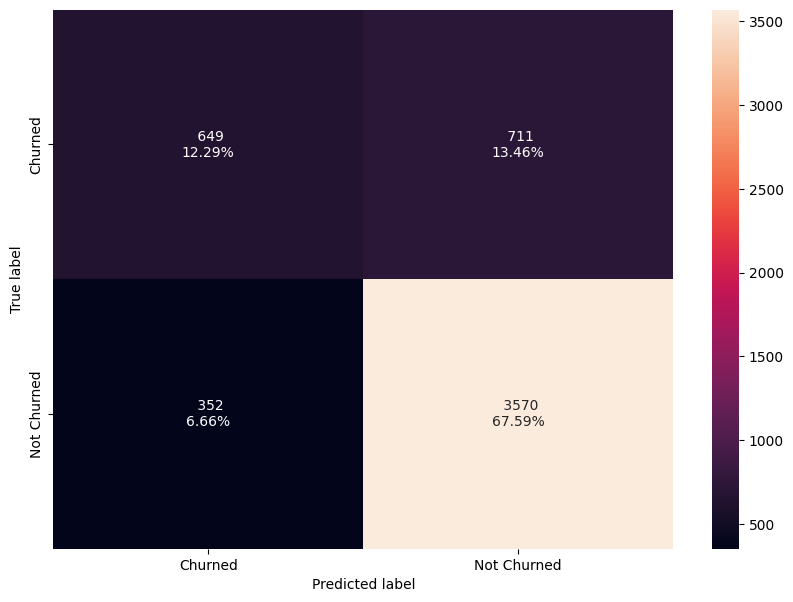

In [654]:
pred_train1 = lr.predict(x_train_fin)
make_confusion_matrix(y_train, pred_train1)

In [655]:
pred_train1 = pd.DataFrame(pred_train1, columns=['Predicted'])

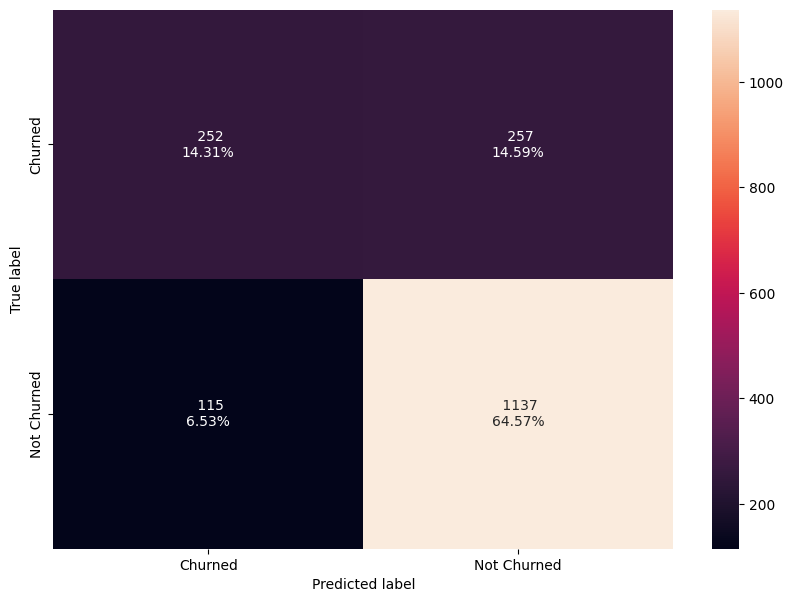

In [656]:
pred_test1 = lr.predict(x_test_fin)
make_confusion_matrix(y_test, pred_test1)

In [657]:
pred_test1 = pd.DataFrame(pred_test1, columns=['Predicted'])

In [658]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
print(f"The percentage of correctly predicted instances (both true positives and true negatives) out of the total instances.")
print(f'Accuracy on train data: {round(accuracy_score(y_train, pred_train1), 4)*100}%')
print(f'Accuracy on test data: {round(accuracy_score(y_test, pred_test1), 4)*100}%\n')

print(f"The percentage of actual positive instances that were correctly predicted.")
print(f'Recall on train data: {round(recall_score(y_train, pred_train1), 4)*100}%')
print(f'Recall on test data: {round(recall_score(y_test, pred_test1), 4)*100}%\n')

print(f"The percentage of predicted positive instances that were actually positive.")
print(f'Precision on train data: {round(precision_score(y_train, pred_train1), 4)*100}%')
print(f'Precision on test data: {round(precision_score(y_test, pred_test1), 4)*100}%\n')

print(f"A metric that combines both precision and recall into a single value. It is a balanced measure")
print(f'F1 score on train data: {round(f1_score(y_train, pred_train1), 4)*100}%')
print(f'F1 score on test data: {round(f1_score(y_test, pred_test1), 4)*100}%')

The percentage of correctly predicted instances (both true positives and true negatives) out of the total instances.
Accuracy on train data: 79.88%
Accuracy on test data: 78.88%

The percentage of actual positive instances that were correctly predicted.
Recall on train data: 47.72%
Recall on test data: 49.51%

The percentage of predicted positive instances that were actually positive.
Precision on train data: 64.84%
Precision on test data: 68.66%

A metric that combines both precision and recall into a single value. It is a balanced measure
F1 score on train data: 54.98%
F1 score on test data: 57.53%


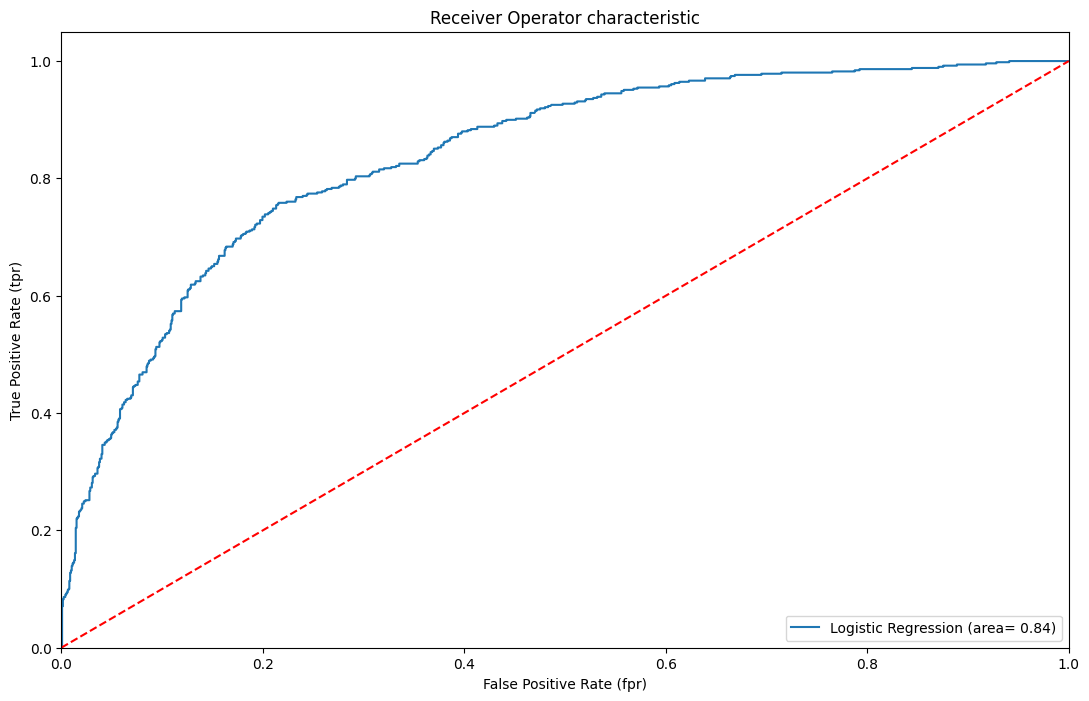

In [659]:
logit_roc_auc = roc_auc_score(y_test, lr.predict_proba(x_test_fin)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, lr.predict_proba(x_test_fin) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()